In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

def parser(s):
    return datetime.strptime(s, '%d/%m/%Y')



df = pd.read_csv("./archive/datos.csv",delimiter=";", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(df.head())
#df.info()
df = df.asfreq(pd.infer_freq(df.index))

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64


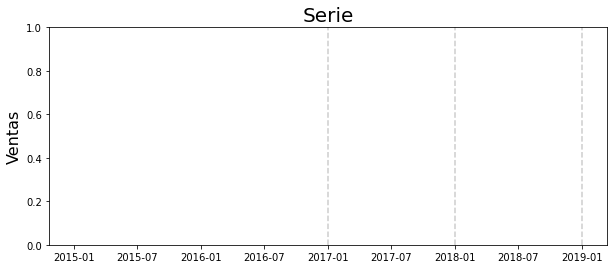

In [18]:
start_date = datetime(2017,1,1)
end_date = datetime(2020,1,1)
lim_catfish_sales = df[start_date:end_date]
plt.figure(figsize=(10,4))
#plt.plot(lim_df)
plt.title('Serie', fontsize=20)
plt.ylabel('Ventas', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [5]:
first_diff = lim_catfish_sales.diff()[1:]

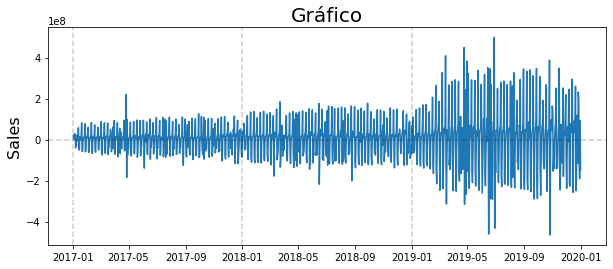

In [6]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Gráfico', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

<BarContainer object of 20 artists>

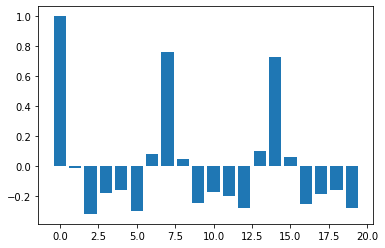

In [7]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 20 artists>

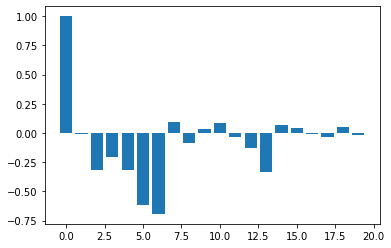

In [8]:
pacf_vals = pacf(first_diff)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [9]:
train_end = datetime(2019,7,1)
test_end = datetime(2020,1,1)

train_data = lim_catfish_sales[:train_end]
test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]
print(train_data)

Fecha
2017-01-01       123704
2017-01-02     21209771
2017-01-03     26706072
2017-01-04     29734324
2017-01-05     58392417
                ...    
2019-06-27    268626998
2019-06-28    768298703
2019-06-29    335249141
2019-06-30    270897688
2019-07-01    109006018
Freq: D, Name: Ventas, Length: 912, dtype: int64


In [10]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 7)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [11]:

#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.30963587760925293


In [12]:
## summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 7)   Log Likelihood              -17514.930
Date:                             Mon, 26 Oct 2020   AIC                          35035.860
Time:                                     20:35:26   BIC                          35050.304
Sample:                                 01-01-2017   HQIC                         35041.375
                                      - 07-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9966      0.003    314.921      0.000       0.990       1.003
ma.S.L7       -0.8401      

In [13]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

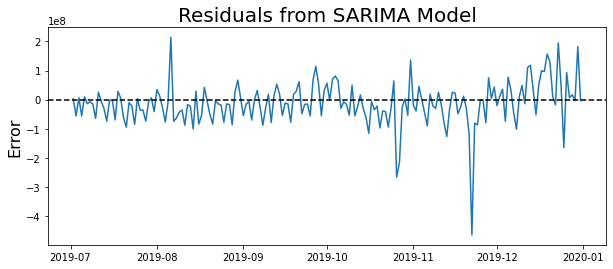

In [14]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

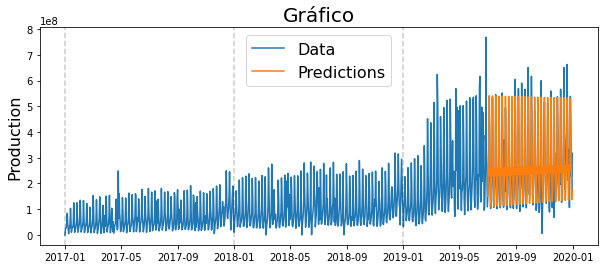

In [15]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Gráfico', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.4553
Root Mean Squared Error: 74253230.49311274


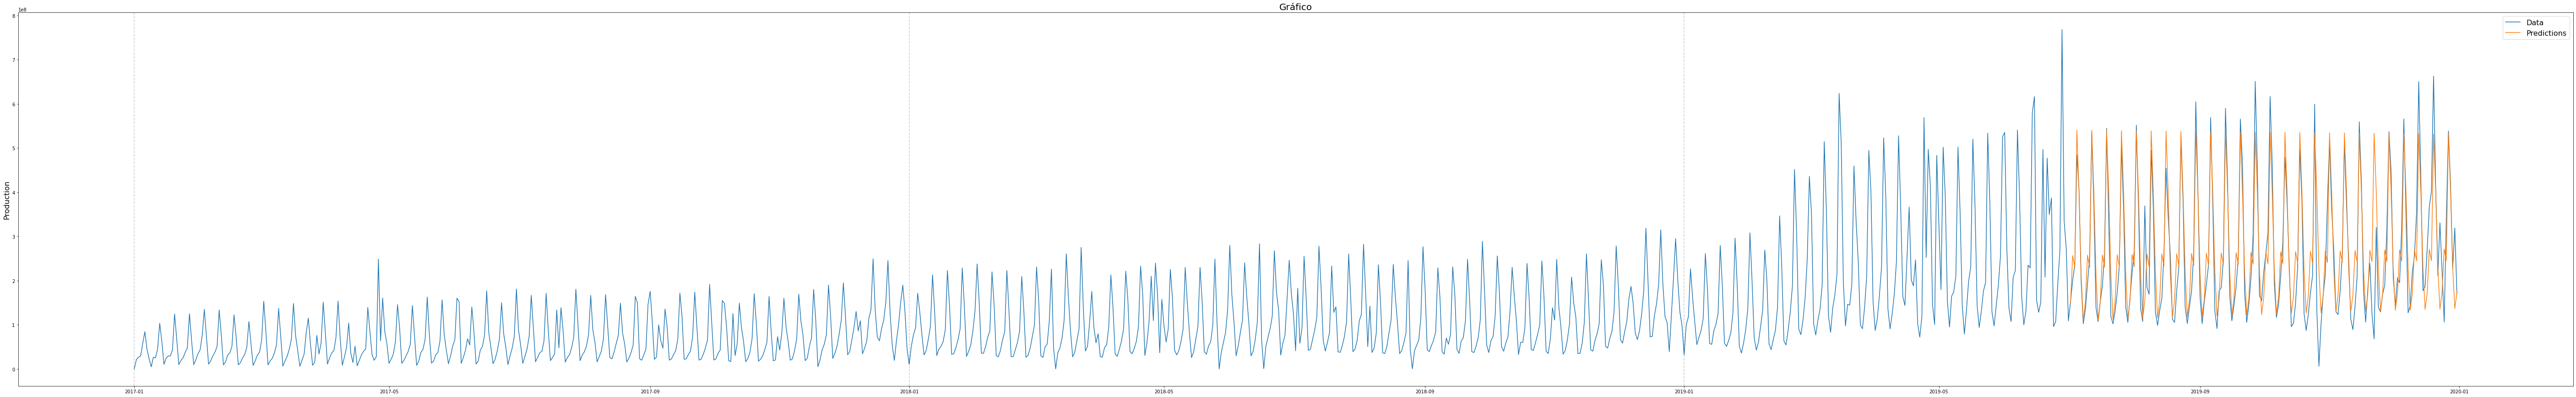

In [17]:
plt.figure(figsize=(100,15))

plt.plot(lim_catfish_sales)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Gráfico', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)